# **Homework 5**
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW5_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission. 

**NOTE:** Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 04/02/2021 (Friday).

Please ensure you follow all the steps mentioned in the homework.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below - 

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name')) 

The dataset you will analyze in this HW is the RMS Titanic. https://en.wikipedia.org/wiki/RMS_Titanic.

Your goal is to classify survivability based on the various factors of the passengers. 

For our problem, we will choose the factors listed below:

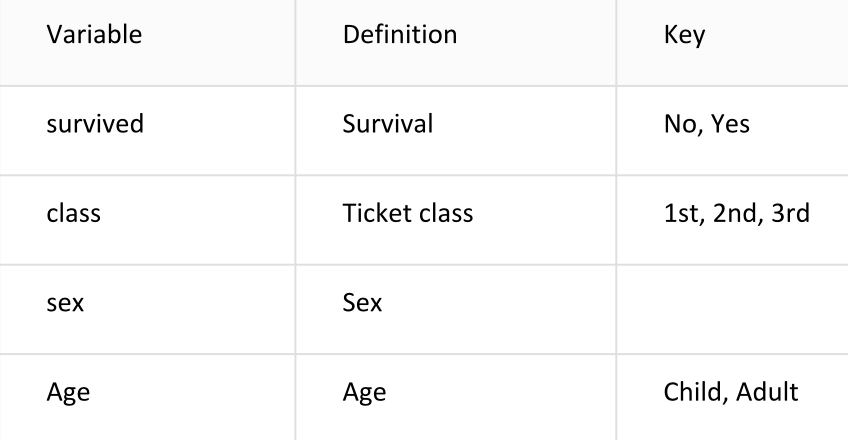

The dataset we will be using can be found in the shared dataset folder. The file name is Titanic.csv

1. Read the dataset into a dataframe. Display the first 5 rows of the dataframe. (2)
2. Explore the dataset and determine what is the target variable. (2)
3. Drop factor(s) that are not likely to be relevant for logistic regression. (2)
4. Make sure there are no missing values. Handle missing values if any. (2)
5. Plot count plots of each of the remaining factors (including the target variable). (3)
6. Convert all categorical feature variables into dummy variables. (3)
7. Partition the data into train and test sets (70/30). Use random_state = 2020. (2)
8. Fit the training data to a logistic regression model. (2)
9. Predict the outcomes for the test set. (2)
10. Display the accuracy of your predictions for survivability. (2)
11. Display the confusion matrix along with the labels (Yes, No).
Hint: You may want to use from sklearn.metrics import plot_confusion_matrix (2)
12. Now, display the predicted value of the survivability of a male adult passenger traveling in 3 rd class. (3)
13. Next, display the predicted probability of the survivability of a male adult passenger traveling in 3 rd class. (3)

In [76]:
# import all necessary libraries here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix

1. Read the dataset into a dataframe. Display the first 5 rows of the dataframe. 

In [58]:
# Type solution here
frame = pd.read_csv("Titanic.csv")
frame.head()

,Passenger,Class,Sex,Age,Survived
0,1,3rd,Male,Child,No
1,2,3rd,Male,Child,No
2,3,3rd,Male,Child,No
3,4,3rd,Male,Child,No
4,5,3rd,Male,Child,No


2. Explore the dataset and determine what is the target variable.

In [59]:
print("Info of the data frame \n")

print(frame.info(), "\n")
print("Values in the column Class", frame["Class"].unique())
print("Values in the column Sex", frame["Sex"].unique())
print("Values in the column Age", frame["Age"].unique())
print("Values in the column Survived", frame["Survived"].unique())

Info of the data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Passenger  2201 non-null   int64 
 1   Class      2201 non-null   object
 2   Sex        2201 non-null   object
 3   Age        2201 non-null   object
 4   Survived   2201 non-null   object
dtypes: int64(1), object(4)
memory usage: 86.1+ KB
None 

Values in the column Class ['3rd' '1st' '2nd' 'Crew']
Values in the column Sex ['Male' 'Female']
Values in the column Age ['Child' 'Adult']
Values in the column Survived ['No' 'Yes']


There are 2201 entries (rows) and there are 5 columns (Passenger, Class, Sex, Age, Survived). There are no empty or null values in the data frame. All of the columns are objects which are categorical type, except for Passenger which is of integer type since it is an ID. The Titanic ship is split into 4 classes (3rd, 1st, 2nd, Crew) and age is grouped into child and adult.

The target variable is the Survived column to determine whether a person has survived or not.

3. Drop factor(s) that are not likely to be relevant for logistic regression.

In [60]:
# I am dropping Passenger because it has unique values and is an ID column
frame.drop(["Passenger"], inplace = True, axis = 1)
frame

,Class,Sex,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


4. Make sure there are no missing values. Handle missing values if any.

In [61]:
frame.isnull().sum()

Class       0
Sex         0
Age         0
Survived    0
dtype: int64

From the above results, there is no missing values since all the columns display 0 for any null values.

5. Plot count plots of each of the remaining factors (including the target variable).

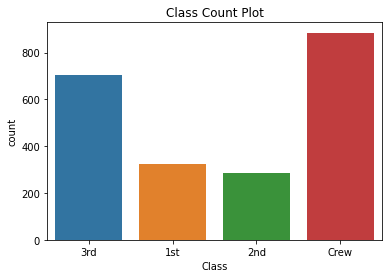

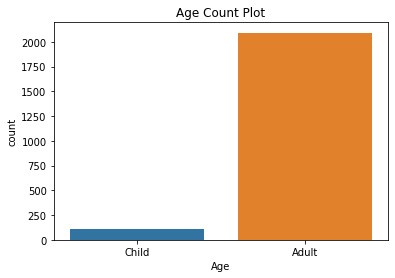

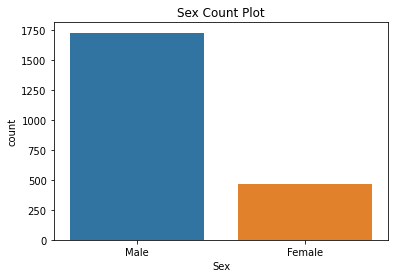

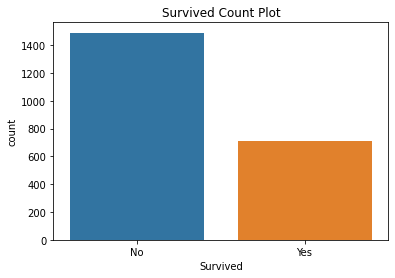

In [62]:
sns.countplot(x="Class", data = frame)
plt.title("Class Count Plot")
plt.show()
sns.countplot(x="Age", data = frame)
plt.title("Age Count Plot")
plt.show()
sns.countplot(x="Sex", data = frame)
plt.title("Sex Count Plot")
plt.show()
sns.countplot(x="Survived", data = frame)
plt.title("Survived Count Plot")
plt.show()

6. Convert all categorical feature variables into dummy variables

In [63]:
X_temp = frame[["Class","Age","Sex"]].copy()
X = pd.get_dummies(X_temp)
X

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Age_Adult,Age_Child,Sex_Female,Sex_Male
0,0,0,1,0,0,1,0,1
1,0,0,1,0,0,1,0,1
2,0,0,1,0,0,1,0,1
3,0,0,1,0,0,1,0,1
4,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
2196,0,0,0,1,1,0,1,0
2197,0,0,0,1,1,0,1,0
2198,0,0,0,1,1,0,1,0
2199,0,0,0,1,1,0,1,0


In [64]:
dic = {"Yes" :1, "No" : 0}
frame["Survived"] = frame["Survived"].replace(dic)
frame
y = frame["Survived"]

Since the target variable should only be one column, instead of getting the dummies I manually encoded yes to 1 (indicating survival) and no to 0 (indicating no survival).

7. Partition the data into train and test sets (70/30). Use random_state = 2020. 



In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 2020)
print("X train shape", X_train.shape, ", X test shape", X_test.shape, ", y train shape", y_train.shape, ", y test shape", y_test.shape)


X train shape (1540, 8) , X test shape (661, 8) , y train shape (1540,) , y test shape (661,)


8. Fit the training data to a logistic regression model.

In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

9. Predict the outcomes for the test set.

In [73]:
y_pred = model.predict(X_test)
print("The predictions are as follows: ", y_pred)
print(list(y_test))

The predictions are as follows:  [1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0
 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 

10. Display the accuracy of your predictions for survivability.

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the predictions for survivability", accuracy)

Accuracy of the predictions for survivability 0.773071104387292


11. Display the confusion matrix along with the labels (Yes, No). 

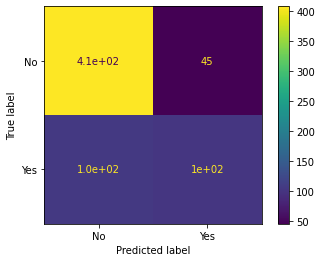

In [80]:
plot_confusion_matrix(model, X_test, y_test, display_labels=["No","Yes"])

12. Now, display the predicted value of the survivability of a male adult passenger traveling in 3 rd class.

In [84]:
x_test = [[0,0,1, 0, 1, 0, 0, 1]]
pred = model.predict(x_test)
pred

array([0])

I manually coded the information of a male adult passenger traveling in 3rd class on the basis of the one hod encoded or dummie data frame that was created to train the logistic regression model. The result that was obtained after predicting using the manually coded values is that a male adult passenger traveling in 3rd class most likely did not survive. 

The format of my data frame with dummies:
[Class_1st	Class_2nd	Class_3rd	Class_Crew	Age_Adult	Age_Child	Sex_Female	Sex_Male]

The values that I passed to predict: [0,0,1, 0, 1, 0, 0, 1]

The predicted result is 0, which indicated that the person did not survive.

13. Next, display the predicted probability of the survivability of a male adult passenger traveling in 3 rd class.

In [93]:
proba = model.predict_proba(x_test)
print("Predicted Probablities ", proba)
print("Where", proba[0][0], "representing non survival and", proba[0][1], "representing survivability")

Predicted Probablities  [[0.88861482 0.11138518]]
Where 0.8886148212684456 representing non survival and 0.1113851787315544 representing survivability


The predicted probability of survival for a male adult passenger traveling in 3rd class is 0.11